## Linear Regression for Predicting Google Stock Prices

In [563]:
import pandas as pd
import math, datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

In [564]:
import quandl
quandl.ApiConfig.api_key="bsZzMiC7v9JnsD46JhM3"
df = quandl.get('WIKI/GOOGL')

In [565]:
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-10-20,1007.05,1008.65,1002.270,1005.07,1568454.0,0.0,1.0,1007.05,1008.65,1002.270,1005.07,1568454.0
2017-10-23,1005.18,1005.79,983.100,985.54,1623580.0,0.0,1.0,1005.18,1005.79,983.100,985.54,1623580.0
2017-10-24,986.50,989.26,977.080,988.49,1416283.0,0.0,1.0,986.50,989.26,977.080,988.49,1416283.0
2017-10-25,986.27,994.43,977.722,991.46,1368042.0,0.0,1.0,986.27,994.43,977.722,991.46,1368042.0
2017-10-26,998.47,1006.51,990.470,991.42,1827682.0,0.0,1.0,998.47,1006.51,990.470,991.42,1827682.0


In [566]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100

In [567]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change','Adj. Volume']]
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2017-10-20,1005.07,0.356194,-0.196614,1568454.0
2017-10-23,985.54,2.054711,-1.953879,1623580.0
2017-10-24,988.49,0.077897,0.201723,1416283.0
2017-10-25,991.46,0.299558,0.526225,1368042.0
2017-10-26,991.42,1.522059,-0.706080,1827682.0


In [568]:
forecast_col='Adj. Close' 

In [569]:
df.fillna(-99999, inplace=True)

In [570]:
forecast_out= int(math.ceil(0.01*len(df))) # 1% of the DataFrame
forecast_out

34

In [571]:
df['label']=df[forecast_col].shift(-forecast_out)
# this way the label column for each row will be...
# ... the adjusted price of 100 days into the future

In [572]:
df.head(10)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.639972
2004-08-20,54.322689,0.710922,7.227007,22834300.0,69.078238
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,67.839414
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,68.912727
2004-08-25,53.164113,1.886792,1.183658,9188600.0,70.668146
2004-08-26,54.122070,0.037068,2.820391,7094800.0,71.219849
2004-08-27,53.239345,2.326896,-1.803885,6211700.0,72.278116
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,74.810934
2004-08-31,51.343492,1.308977,0.048866,4917800.0,74.199045


In [573]:
from sklearn import preprocessing,model_selection, svm
from sklearn.linear_model import LinearRegression

In [574]:
X = np.array(df.drop(['label'],1)) #features
X

array([[  5.03228418e+01,   3.71256291e+00,   3.24967503e-01,
          4.46590000e+07],
       [  5.43226889e+01,   7.10922353e-01,   7.22700723e+00,
          2.28343000e+07],
       [  5.48693765e+01,   3.72943327e+00,  -1.22788010e+00,
          1.82561000e+07],
       ..., 
       [  9.88490000e+02,   7.78965897e-02,   2.01723264e-01,
          1.41628300e+06],
       [  9.91460000e+02,   2.99558227e-01,   5.26225070e-01,
          1.36804200e+06],
       [  9.91420000e+02,   1.52205927e+00,  -7.06080303e-01,
          1.82768200e+06]])

## Preprocessing Data
`sklearn.preprocessing` package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

*Standardization of datasets* is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: *Gaussian with zero mean and unit variance.*

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

In [575]:
X = preprocessing.scale(X) 
# Standardize a dataset along any axis.
# Center to the mean and component wise scale to unit variance.
X

array([[-1.45540979,  2.33204746,  0.23146157,  4.41463645],
       [-1.4381851 , -0.3140794 ,  4.80926826,  1.78627076],
       [-1.43583088,  2.3469197 , -0.79847109,  1.23491456],
       ..., 
       [ 2.58465415, -0.87212972,  0.14971931, -0.79311777],
       [ 2.59744397, -0.67672165,  0.36494649, -0.79892747],
       [ 2.59727172,  0.40098662, -0.4523852 , -0.74357267]])

In [576]:
X, X_lately = X[:-forecast_out], X[-forecast_out:]
df.dropna(inplace=True)

In [577]:
y = np.array(df['label']) # label
y

array([  69.63997192,   69.0782379 ,   67.83941377, ...,  988.49      ,
        991.46      ,  991.42      ])

In [578]:
len(X),len(y)

(3288, 3288)

#### Splitting the Dataset

In [579]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

#### Training the data

In [580]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train) # fit is synonymous with train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

***Let's Test it***

In [581]:
accuracy= clf.score(X_test,y_test) # score is synonymous with test
accuracy

0.97218719613981119

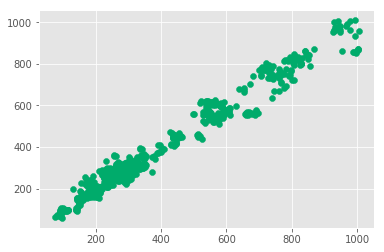

In [582]:
y_pred = clf.predict(X_test)
plt.scatter(y_test,y_pred,color='#00ab6b')

### Let's Forecast some data

In [583]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2017-09-01,951.99,0.665973,-0.572342,1034769.0,1005.07
2017-09-05,941.48,1.052109,-0.568194,1455058.0,985.54
2017-09-06,942.02,0.263264,-0.196002,1375952.0,988.49
2017-09-07,949.89,0.063849,0.597299,1103286.0,991.46
2017-09-08,941.41,0.986818,-0.872907,996449.0,991.42


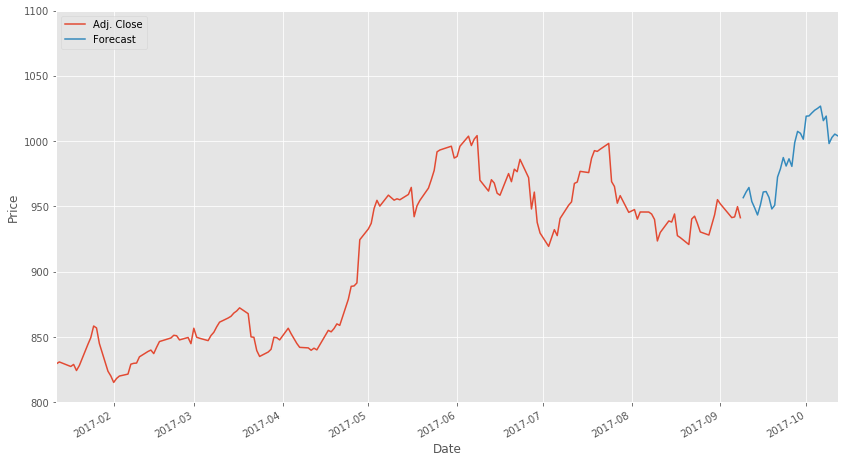

In [584]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name # Timestamp('2017-09-08 00:00:00')
last_unix = last_date.timestamp() # 1504809000.0
one_day = 86400
next_unix = last_unix + one_day # 1504895400.0
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix) # datetime.datetime(2017, 9, 9, 0, 0)
    next_unix+=one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
    
fig,ax=plt.subplots(figsize=(14,8))
ax.set(ylim=[800,1100],xlabel='Date',ylabel='Price')
df=df.tail(200)
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=2)

### Let's use another algorithm

0.66777184697135827

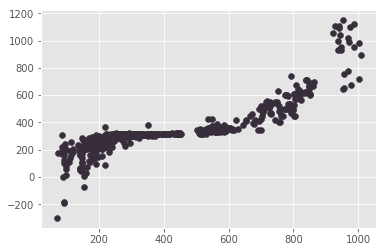

In [561]:
clf = svm.SVR( kernel='poly' ) # support vector regression
clf2.fit( X_train, y_train )
y_pred2 = clf2.predict( X_test )
plt.scatter( y_test,y_pred2,color='#372d3b' )
clf2.score( X_test,y_test )